# I. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Függvényillesztés a lineáris $\chi^2$ módszerrel


A lineáris $\chi^2$-illesztés módszere olyan modellek paramétereinek meghatározására alkalmas, ahol az illesztendő függvény felírható tetszőleges függvények lineárkombinációjaként, feltéve, hogy az illesztési paraméterek csak a lineárkombináció együtthatóinak szerepét töltik be, vagyis

$$ y(\mathbf{a}, \mathbf{x}) = \sum_k a_k f_k(\mathbf{x}), $$

ahol $\mathbf{a}$ a keresett paraméterekből alkotott vektor vektor, $\mathbf{x}$ pedig a független változó. További feltétel, hogy az $f_k(\mathbf{x})$ többváltozós függvények az összes $\textbf{x}$ mérési pontban kiértékelhetők legyenek. Amennyiben a mérési hiba gauss-i, úgy az $y_i$ mért értékek hibáját egy $\sigma_i$ értékkel jellemezhetjük, ahol az $i$ index a mérési pontokon fut. A függvényillesztés jóságát a

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

mennyiséggel jellemezhetjük, mely Gauss-eloszlású hiba esetében egzaktul következik a _maximum likelihood_ módszerből. A legjobban illeszkedő modellre a $\chi^2$ kifejezésének értéke minimális, azaz azokat az $a_k$ paramétereket keressük, melyek mellett $\chi^2$ parciális deriváltjai eltűnnek:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} = 0
$$

minden $a_k$-ra. A parciális deriváltakra így felírt egyenletrendszer általában nem lineáris, így a megoldására közvetlen gyökkereső módszerekkel nem sok esélyünk van. Amennyiben azonban az $y(\mathbf{a}, \mathbf{x})$ modellt a fent bevezett lineárkombináció alakjában adjuk meg, úgy könnyen belátható, hogy a deriváltak nullává tétele a kövezkező egyenletrendszerre vezet:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    2 \cdot \sum_i \left[ \frac{1}{\sigma_i^2} \cdot 
        \left( 
            \sum_j a_j f_j(\mathbf{x}_i) - y_i
        \right) \cdot f_k(\mathbf{x}_i) \right] = 0.
$$

Ez már lineáris egyenletrendszer az $a_k$ együtthatókra, hiszen az $y_i$ mért értékek és az $f_k(\mathbf{x}_i)$ bázisfüggvények az $\mathbf{x}_i$ mérési pontokban ismertek. Könnyű belátni, hogy némi átírás után bevezethető egy $X_{ik}$, ún. tervmátrix, és egy $b_i$ hibával redukált vektor:

$$
X_{ik} = \frac{f_k(\mathbf{x}_i)}{\sigma_i} \quad \quad \quad
b_i = \frac{y_i}{\sigma_i}.
$$

A parciális deriváltak nullává tételével felírt egyenletrendszer ezekkel a jelölésekkel

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    \sum_i \left[ \left( \sum_j a_j X_{ij} - b_i \right) X_{ik} \right] = 0
$$

alakúnak adódik, mely átrendezés után 

$$
\sum_i \sum_j X_{ij} X_{ik} a_j  = \sum_i X_{ik} b_i,
$$

vagy mátrixos írásmóddal

$$
\mathbf{X}^{T} \mathbf{X} \mathbf{a} = \mathbf{X}^{T} \mathbf{b}
$$

alakot ölt. Az egyenletet $\mathbf{a}$-ra megoldva megkapjuk a $\chi^2$-et minimalizáló paramétereket.

## A redukált $\chi^2$

Mivel a $\chi^2$-re felírt kifejezés függ a mérési pontok számától, ezért a $\chi^2$ értéke nem használható arra, hogy két, különböző mérési sorozat esetében megállapítsuk, hogy ugyanaz a modell mennyire jól illeszkedik az egyik vagy másik adatsorra. Éppen ezért érdemes bevezetni a redukált $\chi^2$ nevű mennyiséget:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \approx 1$.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ij} X_{ik} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

## Hibabecslés a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét. Ehelyett egy gyakran használt, egyszerűbb, de igen hasznos eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az illesztést a mérési adatok egy véletlen részhalmazára (pl. egyharmadára) végezzük el, majd egy másik véletlen részhalmazt választunk, mellyel ismét elvégezzük az illesztést, és így tovább. Kellően sokszor megismételve az eljárást az illesztési paraméterekre egy-egy eloszlást kapunk, melyeknek meghatározhatjuk a várható értékét, szórását és kovarianciáit. A legjobban illeszkedő modellparamétereknek tekinthetjük az eloszlások várható értékét, míg illesztési hibának a szórásukat.


## Irodalomjegyzék

* Press, Teukolsky, Vetterling & Flannery: Numerical Recipes (in C), 3. kiadás, Cambridge University Press, 15.4. fejezet

# Feladatok

## 1. feladat

Az alábbi függvény egy véletlenszerű adatsort generál. Írjunk rövid programot, mely az adatokra parabolát illeszt! A program ne beépített függvényillesztő rutint használjon, hanem végezze el a számolást a fent definiált $X_{ij}$ mátrix előállításával, és felírt lineáris egyenletrendszer megoldásával! Az egyenletrendszer megoldására tetszőleges függvénykönyvtár használható. Ábrázoljuk az adatokat és az eredményt! Próbáljuk meg úgy megírni a programot, hogy az tetszőleges fokszámú polinom illesztésére is alkalmas legyen! Számítsuk ki a legjobban illeszkedő modell esetében a redukált $\chi^2$ értékét!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def some_random_coeffs():
    a = 10 * np.random.rand() - 2.5
    b = 20 * np.random.rand() - 5
    c = 100 * np.random.rand() - 50
    return a, b, c

def some_random_data(a, b, c, N):
    x = np.linspace(-N, N, 2 * N + 1)
    sigma = 10 * (np.random.rand(x.shape[0]) + 1)
    y = np.random.normal(a * x**2 + b * x + c, sigma)
    return x, y, sigma

def random_data_with_outliers(a, b, c, N, M):
    x, y, sigma = some_random_data(a, b, c, N)
    idx = np.random.randint(0, 2 * N, M)
    y[idx] = np.min(y) + np.random.rand() * (np.max(y) - np.min(y))
    return x, y, sigma

In [19]:
a, b, c = some_random_coeffs()
x, y, sigma = some_random_data(a, b, c, 10)
np.savetxt('adatsor.txt', np.transpose([x, y, sigma]))

In [20]:
#ábra a mérési pontokkal és hibaintervallumokkal
def raw_plot(x,y,sigma,xlabel,ylabel,title):
    
    #ábrázolás
    plt.figure(figsize=(10,5))
    plt.errorbar(x,y,sigma,fmt='o')
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.title(title,fontsize=20)
    plt.grid(True)

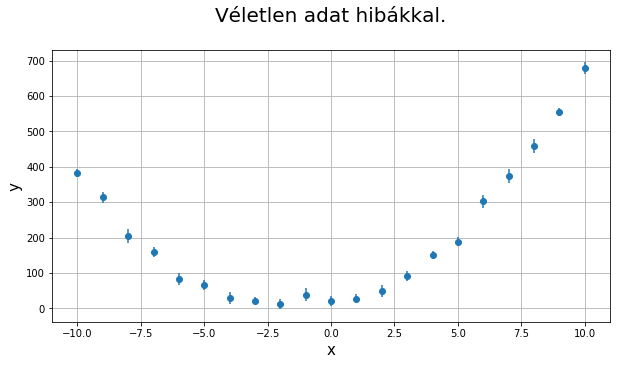

In [21]:
raw_plot(x,y,sigma,'x','y','Véletlen adat hibákkal.\n')

In [22]:
#az illesztést elvégző program helye

In [42]:
#a chi2 módszerhez szükséges a paraméterek legyártása
def chi2_fit(x,y,sigma,dim):
    
    #ha túl alacsony az illesztendő polinom rendje, akkor térjen vissza hibával
    if(dim<0):
        print('ERROR\nThe order of the given polynom is too low.')
        return -1

    #tervmátrix és a hibával redukált vektor feltöltése a bázisfüggvényekkel
    X=np.stack([x**i/sigma for i in range(dim+1)],axis=1)
    b=np.stack([y/sigma],axis=1) 
    
    #mátrix transzponálása
    XT=np.transpose(X)
    
    #lineáris egyenletrendszer megoldása
    a=np.linalg.solve(np.matmul(XT,X),np.matmul(XT,b))
    
    #visszatérés az illesztési paraméterek tömbjével
    return a

In [7]:
#az illesztés elvégézése és ábrázolása
def chi2_plot(x,y,sigma,dim,xlabel,ylabel,title):
    
    #paraméterlista
    a=chi2_fit(x,y,sigma,dim)
    
    #x-tengelyen lévő helyek felvétele
    u=np.linspace(x[0],x[-1])
    
    #y-tengelyen lévő értékek felvétele
    v=np.polynomial.polynomial.polyval(u,a,tensor=False)
    
    #ábrázolás
    plt.plot(u,v,label='Illesztett görbe')
    plt.errorbar(x,y,sigma,fmt='o',label='Mért adatok')
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.title(title,fontsize=20)
    plt.grid(True)
    plt.legend()

In [8]:
#redukált chi2 értékének meghatározása
def chi2_reduced(x,y,sigma,dim):
    
    #illesztési paraméterek legyártása
    a=chi2_fit(x,y,sigma,dim)
    
    #illesztett polinom kiértékelése
    yfit=np.polynomial.polynomial.polyval(x,a,tensor=False)
    
    #visszatérés a redukált chi2 értékével
    return np.sum(((yfit-y)/sigma)**2)/(x.shape[0]-(dim+1))

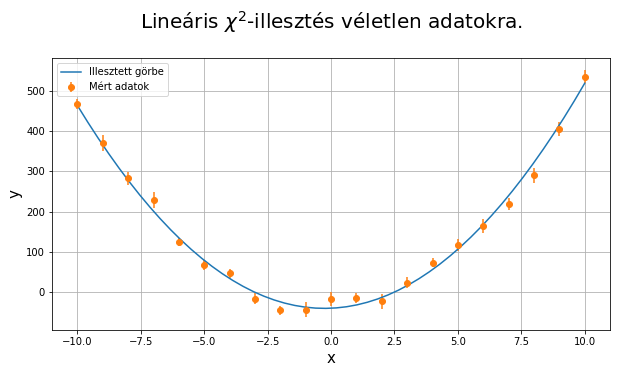

In [9]:
#ábra a legjobban illeszkedő modellel (parabola esetén)
plt.figure(figsize=(10,5))
chi2_plot(x,y,sigma,2,'x','y','Lineáris $\chi^2$-illesztés véletlen adatokra.\n')

In [10]:
#a redukált chi^2 értéke a legjobban illeszkedő modell esetére (parabola esetén)
chi2_reduced(x,y,sigma,2)

1.3405058226139677

## 2. feladat

Az alábbi függvényhívás olyan adatsort generál, amely kilógó (a megadott hibaértékkel nem jól jellemzett, vagy sok szigma értékkel eltérő) adatpontokat is tartalmaz. Írjunk programot, mely a $3\sigma$-nál jobban kilógó pontok elhagyásával, két lépésben, illetve iteratív módon végzi el a parabolaillesztést!

In [11]:
a, b, c = some_random_coeffs()
x, y, sigma = random_data_with_outliers(a, b, c, 10, 3)

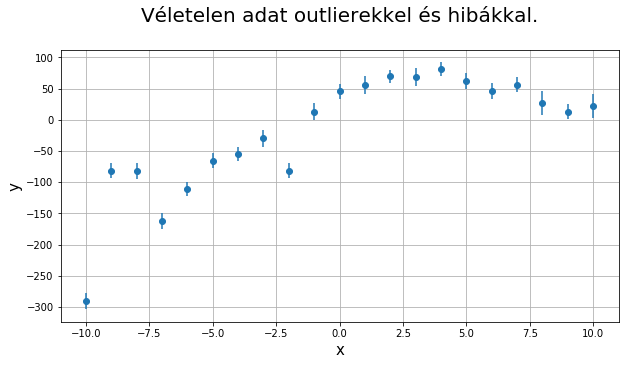

In [12]:
#ábrázolás
raw_plot(x,y,sigma,'x','y','Véletelen adat outlierekkel és hibákkal.\n')

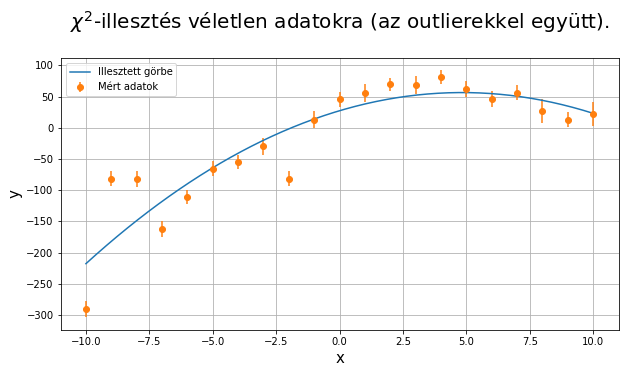

In [13]:
#parabolaillesztés a nyers adatokra
plt.figure(figsize=(10,5))
chi2_plot(x,y,sigma,2,'x','y','$\chi^2$-illesztés véletlen adatokra (az outlierekkel együtt).\n')

In [14]:
#3 sigma-nál nagyobb távolságra lévő adatpontok kiszűrése (parabolát illesztünk)
def sigma3(x,y,sigma):
    
    #illesztési paraméterek legyártása
    a=chi2_fit(x,y,sigma,2)
    
    #illesztett polinom kiértékelése
    yfit=np.polynomial.polynomial.polyval(x,a,tensor=False)
    
    #maszkolás
    M=np.stack(np.array([x,y,sigma])[i][3*sigma>np.abs(yfit-y)] for i in range(3))
    
    #visszatérés a szűrt tömbök tömbjével
    return M

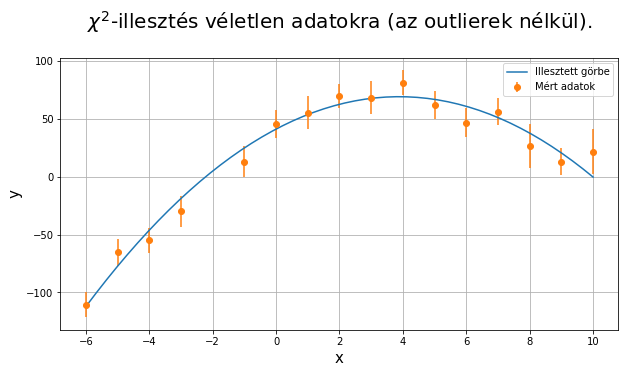

In [15]:
#újabb illesztés outlierek szűrése után
plt.figure(figsize=(10,5))
data_new=sigma3(x,y,sigma)
chi2_plot(*data_new,2,'x','y','$\chi^2$-illesztés véletlen adatokra (az outlierek nélkül).\n')

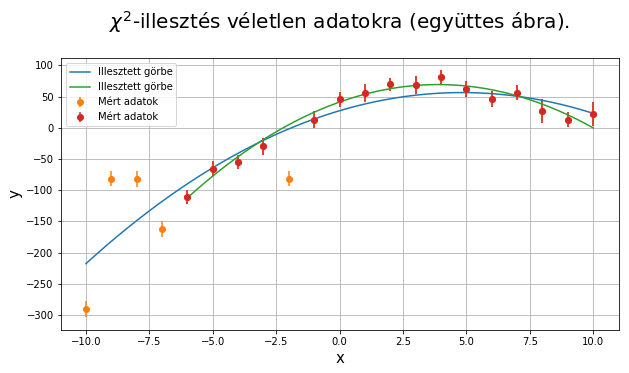

In [16]:
#együttes ábrázolás
plt.figure(figsize=(10,5))
chi2_plot(x,y,sigma,2,'','','')
chi2_plot(*data_new,2,'x','y','$\chi^2$-illesztés véletlen adatokra (együttes ábra).\n')

In [17]:
#iteratív megoldás
def sigma3_it(x,y,sigma):
    
    data0=[x,y,sigma]
    lenght0=x.shape[0]
    
    #iterálás --> kilépési feltétel a tömb hosszváltozása
    for i in range(x.shape[0]):
        data=sigma3(*data0)
        lenght=data[0].shape[0]
        if(lenght==lenght0):
            return data
        else:
            data0=data
            lenght0=lenght
            
    return data

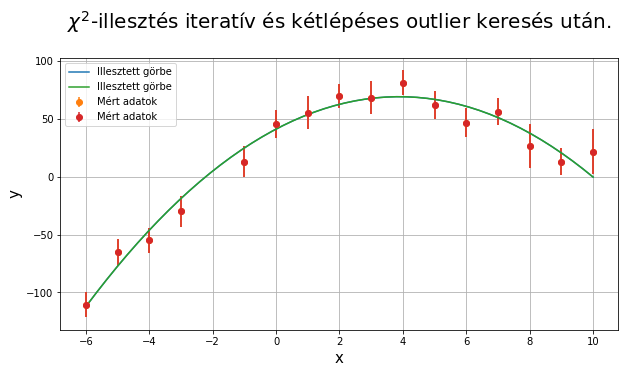

In [18]:
#iteratív megoldás illesztése és összehasonlítás a két lépésessel
plt.figure(figsize=(10,5))
data_new_it=sigma3_it(x,y,sigma)
chi2_plot(*data_new,2,'','','')
chi2_plot(*data_new_it,2,'x','y','$\chi^2$-illesztés iteratív és kétlépéses outlier keresés után.\n')

## 3. feladat

Írjunk függvényt, mely meghatározza az illesztett paraméterek aszimptotikus hibáját és kovarianciáját.

In [19]:
#új adatok generálása a kapott függvények alapján
a, b, c = some_random_coeffs()
x, y, sigma = some_random_data(a, b, c, 10)

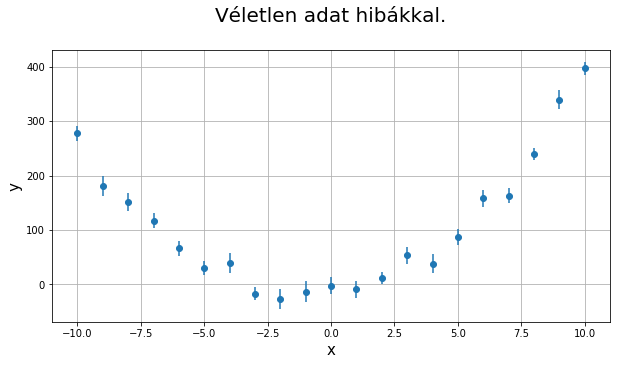

In [20]:
#ábrázolás
raw_plot(x,y,sigma,'x','y','Véletlen adat hibákkal.\n')

In [21]:
#kovarianciamátrix kiszámítása
def cov_mat(x,y,sigma,dim):
    
    #ha tól alacsony az illesztendő polinom rendje, akkor térjen vissza hibával
    if(dim<0):
        print('ERROR\nThe order of the given polynom is too low.')
        return -1
    
    #tervmátrix és a hibával redukált vektor feltöltése a bázisfüggvényekkel
    X=np.stack([x**i/sigma for i in range(dim+1)],axis=1)
    
    #mátrix transzponálása
    XT=np.transpose(X)
    
    #invertálás
    C=np.linalg.inv(np.matmul(XT,X))
    
    return C

In [22]:
#a szórásnyégyzetek és kovarianciák mátrixa
C=cov_mat(x,y,sigma,2)
C

array([[ 2.30091269e+01,  5.55822777e-02, -3.40778532e-01],
       [ 5.55822777e-02,  2.54752563e-01, -5.23556058e-03],
       [-3.40778532e-01, -5.23556058e-03,  8.80751403e-03]])

In [23]:
#hibák és helyük a mátrixban
def err(*a):
    
    #hibák listája
    err=np.array(np.sqrt(np.diagonal(a[0])),ndmin=2)
    
    if(len(a)==1):
        
        #visszatérés csak a hibákkal
        return err
    
    elif((len(a)==2) & (a[1]=='index')):
         
        #indexek
        marker=[]
        for i in range(a[0].shape[0]):
            marker.append((i+1,i+1))

        #eredmény
        result=[]
        for i in range(len(marker)):
            result.append((err[0][i],marker[i]))
            

        #visszatérés az eredmények tömbjével
        return result

In [24]:
#hibák értéke és helye
errs=err(C,'index')
errs

[(4.796782974700484, (1, 1)),
 (0.5047301881489398, (2, 2)),
 (0.09384835657294481, (3, 3))]

In [25]:
#kovarianciák és helyük a mátrixban
def cov(*a):
    
    #kovarianciák
    covs=[]
    
    #indexek
    marker=[]
    
    for i in range(a[0].shape[0]):
        for j in range(a[0].shape[0]):
            if(i!=j):
                covs.append(a[0][i,j])
                marker.append((i+1,j+1))
    
    #eredmény
    result=[]
    for i in range(len(covs)):
        result.append((covs[i],marker[i]))
    
    if(len(a)==1):
        
        #visszatérés csak a kovarianciákkal
        return covs
    
    elif((len(a)==2) & (a[1]=='index')):

        #visszatérés az eredmények tömbjével
        return result

In [26]:
#kovarianciák értéke és helye
cov(C,'index')

[(0.055582277678629013, (1, 2)),
 (-0.3407785322188424, (1, 3)),
 (0.05558227767862914, (2, 1)),
 (-0.005235560578612412, (2, 3)),
 (-0.3407785322188424, (3, 1)),
 (-0.00523556057861241, (3, 2))]

## 4. feladat

Határozzuk meg a kilógó pontokat is tartalmazó adatsor esetében az illesztett parabola paramétereinek eloszlását és hibáját a bootstrap módszer segítségével. A bootstrap eljárás során az illesztést többször megismételjük oly módon, hogy mindig csak a mérési pontok egy véletlen részhalmazát (pl. 60%-át) használjuk fel az illesztéshez. Az így kapott illesztési paraméterekből készítsünk hisztogramot, valamint számítsuk ki a paraméterek várható értékét és szórását! Hasonlítsuk össze a kapott értékeket a kovarianciamátrixból számolt aszimptotikus hibával.

In [27]:
#véletlenszám csomag importálása
import random as rd

In [28]:
#bootstrap mintavételezése
def bootstrap(x,y,sigma,percentage):
        
    #véletlen indexek sorbarendezve
    randoms=np.sort(rd.sample(range(x.shape[0]),int(x.shape[0]*percentage/100)))
        
    #visszatérés az eredmények mátrixával
    return np.stack(np.array([x,y,sigma])[i][randoms] for i in range(3))

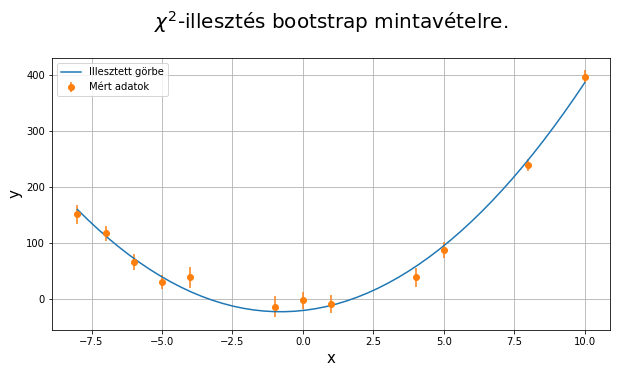

In [29]:
#teszt fit egy részlistára
plt.figure(figsize=(10,5))
chi2_plot(*bootstrap(x,y,sigma,60),2,'x','y','$\chi^2$-illesztés bootstrap mintavételre.\n')

In [30]:
#n db illesztés után az n db illesztési paraméter vektor legyártása
def bootstrap_params(x,y,sigma,percentage,n,dim):
    
    #illesztési paraméterek listája
    params=[chi2_fit(*bootstrap(x,y,sigma,percentage),dim) for i in range(n)]
    
    M=np.stack((chi2_fit(*bootstrap(x,y,sigma,percentage),dim) for i in range(n)),axis=1)

    #visszatérés az eredmények tömbjével
    return M

In [31]:
#hisztogramok legyártása
def bootstrap_hist(boot):
    
    #adatlista legyártása és a hisztogramok plottolása
    for i in range(boot.shape[0]):
        plt.hist(boot[i],bins='auto')
    
    #ábrázolás
    plt.xlabel('Illesztési paraméter értéke',fontsize=10)
    plt.ylabel('Beütés száma adott érték esetén',fontsize=10)
    plt.title('Illesztési paraméterek eloszlása.',fontsize=15)
    plt.grid(True)

In [32]:
boot=bootstrap_params(x,y,sigma,60,1000,2)

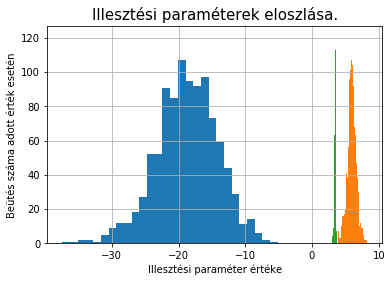

In [33]:
bootstrap_hist(boot)

In [34]:
#várható érték
avg=np.mean(boot,axis=1)
avg

array([[-18.7487344 ],
       [  5.9764517 ],
       [  3.44200072]])

In [35]:
#szórás
std=np.std(boot,axis=1)
std

array([[4.62249741],
       [0.66817638],
       [0.11607083]])

In [36]:
#arány a két módszer szórásai között
std/np.transpose(err(C))

array([[0.96366616],
       [1.32382884],
       [1.23679131]])

## 5. feladat

A mellékelt fájlok olyan adatokat tartalmaznak, ahol öt független változó és egy skalár mért érték között van összefüggés. Írjunk függvényt, mely többváltozós polinomokat illeszt az adatokra a lineáris $\chi^2$ módszer segítségével. A többváltozós polinomok olyan összeg alakban felírt formulák, ahol az összeg minden tagja $k$ változó egész kitevőjű hatványainak szorzata. A többváltozós polinom fokszámát az a tag adja, melyben a hatványkitevők összege maximális. Például a

$$
p(x, y, z) = 3 + 5 x^2 + 4 x y z + 6 y z^3
$$

háromváltozós, negyedfokú polinom, mely vegyes tagokat is tartalmaz.

Az illesztés elvégzése után határozzuk meg az illesztési paraméterek hibáit, és keressünk módot arra, hogy miként ábrázolható a többváltozós illesztés jósága!

Adatfájlok:
    
* [small.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/small.dat.gz)
* [big.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/big.dat.gz)

A fájlok oszlopai:

* 1-5: független változó komponensei
* 6: függő változó (mért érték)
* 7: mérési hiba